In [1]:
import bagpy
import rospy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import numpy as np
from matplotlib import pyplot, patches
from matplotlib.patches import Circle
from descartes.patch import PolygonPatch
pyplot.rcParams.update({'font.size': 22})

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.
Python older than 3.7 detected. 


In [2]:
b = bagreader('/home/patrik/catkin_ws/src/multi_drone_sar/data/bagfiles/2021-05-05-19-28-07.bag') 

[INFO]  Data folder /home/patrik/catkin_ws/src/multi_drone_sar/data/bagfiles/2021-05-05-19-28-07 already exists. Not creating.


In [3]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/airsim_node/drone_1/distance/Distance,sensor_msgs/Range,914,100.007248
1,/airsim_node/drone_1/environment,airsim_ros_pkgs/Environment,914,100.086000
2,/airsim_node/drone_1/global_gps,sensor_msgs/NavSatFix,914,100.066897
3,/airsim_node/drone_1/imu/Imu,sensor_msgs/Imu,914,100.078836
4,/airsim_node/drone_1/lidar/LidarCustom,sensor_msgs/PointCloud2,909,24818.366864
5,/airsim_node/drone_1/odom_local_ned,nav_msgs/Odometry,911,25575.024390
6,/airsim_node/origin_geo_point,airsim_ros_pkgs/GPSYaw,914,99.997711
7,/clock,rosgraph_msgs/Clock,914,99.969110
8,/drone_1/current_charge_level,std_msgs/Float32,91,10.000057
9,/drone_1/feelforce/force,geometry_msgs/Twist,915,1249.606435


In [4]:
force_csv = b.message_by_topic('/drone_1/feelforce/force')
force_msgs = pd.read_csv(force_csv)
force_msgs

,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,1.620236e+09,-0.000244,-0.129833,0.0,0.0,0.0,0.0
1,1.620236e+09,-0.000244,-0.129833,0.0,0.0,0.0,0.0
2,1.620236e+09,-0.000244,-0.129833,0.0,0.0,0.0,0.0
3,1.620236e+09,-0.000244,-0.129833,0.0,0.0,0.0,0.0
4,1.620236e+09,-0.000244,-0.129833,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
910,1.620236e+09,-0.011845,-0.155154,0.0,0.0,0.0,0.0
911,1.620236e+09,-0.011833,-0.155155,0.0,0.0,0.0,0.0
912,1.620236e+09,-0.011833,-0.155155,0.0,0.0,0.0,0.0
913,1.620236e+09,-0.011833,-0.155155,0.0,0.0,0.0,0.0


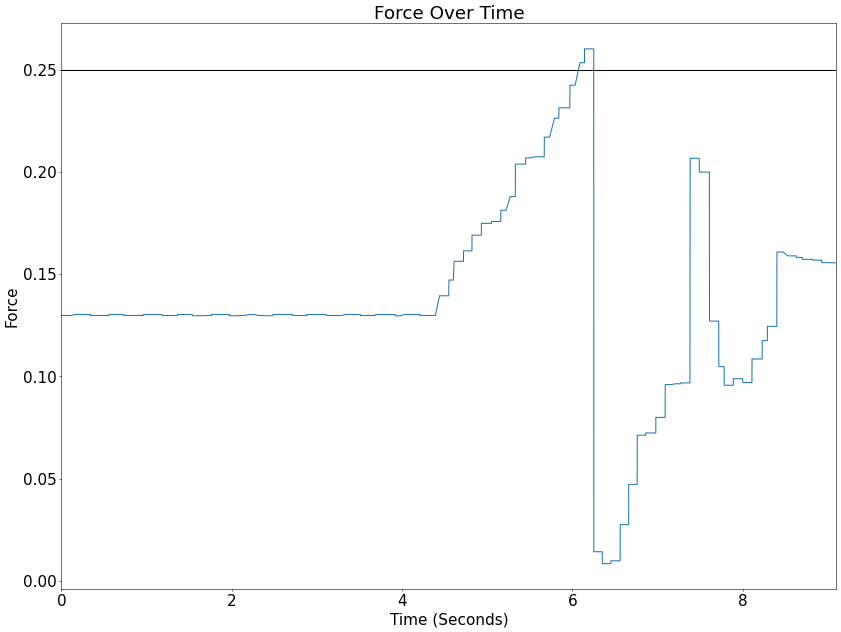

In [5]:
start_time = force_msgs['Time'][0]
end_time = force_msgs['Time'].iloc[-1] - start_time
T = force_msgs['Time']-start_time
dist = np.linalg.norm([i for i in zip(force_msgs['linear.x'].to_numpy(), force_msgs['linear.y'].to_numpy())], axis=1)

pyplot.figure(2, figsize=(20, 15.0), dpi=50)
pyplot.plot(T, dist)
pyplot.hlines(0.25, 0, end_time)
pyplot.xlabel('Time (Seconds)')
pyplot.ylabel('Force')
pyplot.xlim(0, end_time)
pyplot.title('Force Over Time')
pyplot.savefig(f'{b.datafolder}/force_plot.pdf', bbox_inches='tight', dpi=600)